In [14]:
import numpy as np
import pandas as pd
from scipy.stats import *
import matplotlib.pyplot as plt #그래프 패키지 모듈 등록
%matplotlib inline 
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [15]:
df = pd.read_excel('./data/도로교통공단_개인형이동수단(PM) 교통사고 현황_20191231.xlsx')

In [16]:
df = df.iloc[3:22,1:]
df

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
3,발생년도,NaN,NaN,2017,NaN,NaN,2018,NaN,NaN,2019,NaN,NaN
4,사고유형_대분류,사고유형_중분류,사고유형,사고건수,사망자수,부상자수,사고건수,사망자수,부상자수,사고건수,사망자수,부상자수
5,차대사람,횡단중,횡단중,6,0,7,12,1,13,29,0,29
6,차대사람,차도통행중,차도통행중,3,0,4,7,0,8,7,0,8
7,차대사람,길가장자리구역통행중,길가장자리구역통행중,1,0,1,4,0,4,2,0,2
8,차대사람,보도통행중,보도통행중,7,0,8,10,0,10,34,0,35
9,차대사람,기타,기타,16,0,18,28,0,29,58,0,63
10,차대차,정면충돌,정면충돌,6,0,7,8,0,9,18,0,21
11,차대차,측면충돌,측면충돌,28,1,30,66,1,70,124,3,133
12,차대차,추돌,추돌,NaN,NaN,NaN,8,0,10,9,0,11


In [17]:
df.fillna('0',inplace = True)

In [18]:
df.set_index('Unnamed: 1',inplace=True)

In [19]:
df.drop(['Unnamed: 2','Unnamed: 3'],axis=1,inplace=True)

,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
Unnamed: 1,,,,,,,,,
발생년도,2017,0,0,2018,0,0,2019,0,0
사고유형_대분류,사고건수,사망자수,부상자수,사고건수,사망자수,부상자수,사고건수,사망자수,부상자수
차대사람,6,0,7,12,1,13,29,0,29
차대사람,3,0,4,7,0,8,7,0,8
차대사람,1,0,1,4,0,4,2,0,2
차대사람,7,0,8,10,0,10,34,0,35
차대사람,16,0,18,28,0,29,58,0,63
차대차,6,0,7,8,0,9,18,0,21
차대차,28,1,30,66,1,70,124,3,133


In [26]:
df.columns = ['2017_사고건수','2017_사망자수','2017_부상자수','2018_사고건수','2018_사망자수','2018_부상자수','2019_사고건수','2019_사망자수','2019_부상자수']

In [31]:
df.drop(['발생년도','사고유형_대분류','합계'],axis=0,inplace=True)

In [34]:
df.index.name = '사고유형'

In [35]:
df

,2017_사고건수,2017_사망자수,2017_부상자수,2018_사고건수,2018_사망자수,2018_부상자수,2019_사고건수,2019_사망자수,2019_부상자수
사고유형,,,,,,,,,
차대사람,6,0,7,12,1,13,29,0,29
차대사람,3,0,4,7,0,8,7,0,8
차대사람,1,0,1,4,0,4,2,0,2
차대사람,7,0,8,10,0,10,34,0,35
차대사람,16,0,18,28,0,29,58,0,63
차대차,6,0,7,8,0,9,18,0,21
차대차,28,1,30,66,1,70,124,3,133
차대차,0,0,0,8,0,10,9,0,11
차대차,24,0,26,59,0,64,111,0,121


In [36]:
df_cnh = df.loc['차대사람']
df_cnh

,2017_사고건수,2017_사망자수,2017_부상자수,2018_사고건수,2018_사망자수,2018_부상자수,2019_사고건수,2019_사망자수,2019_부상자수
사고유형,,,,,,,,,
차대사람,6,0,7,12,1,13,29,0,29
차대사람,3,0,4,7,0,8,7,0,8
차대사람,1,0,1,4,0,4,2,0,2
차대사람,7,0,8,10,0,10,34,0,35
차대사람,16,0,18,28,0,29,58,0,63


In [40]:
s_1 = df_cnh.astype(int).sum()
s_1

2017_사고건수     33
2017_사망자수      0
2017_부상자수     38
2018_사고건수     61
2018_사망자수      1
2018_부상자수     64
2019_사고건수    130
2019_사망자수      0
2019_부상자수    137
dtype: int64

In [38]:
df_cnc = df.loc['차대차']
df_cnc

,2017_사고건수,2017_사망자수,2017_부상자수,2018_사고건수,2018_사망자수,2018_부상자수,2019_사고건수,2019_사망자수,2019_부상자수
사고유형,,,,,,,,,
차대차,6,0,7,8,0,9,18,0,21
차대차,28,1,30,66,1,70,124,3,133
차대차,0,0,0,8,0,10,9,0,11
차대차,24,0,26,59,0,64,111,0,121


In [41]:
s_2 = df_cnc.astype(int).sum()
s_2

2017_사고건수     58
2017_사망자수      1
2017_부상자수     63
2018_사고건수    141
2018_사망자수      1
2018_부상자수    153
2019_사고건수    262
2019_사망자수      3
2019_부상자수    286
dtype: int64

In [39]:
df_co = df.loc['차량단독']
df_co

,2017_사고건수,2017_사망자수,2017_부상자수,2018_사고건수,2018_사망자수,2018_부상자수,2019_사고건수,2019_사망자수,2019_부상자수
사고유형,,,,,,,,,
차량단독,2,0,2,4,0,4,5,0,5
차량단독,0,0,0,0,0,0,1,0,1
차량단독,0,0,0,0,0,0,1,0,1
차량단독,12,2,10,0,0,0,0,0,0
차량단독,9,1,8,10,0,10,37,5,32
차량단독,2,0,2,9,2,7,10,0,10
차량단독,1,0,1,0,0,0,1,0,1


In [42]:
s_3 = df_co.astype(int).sum()
s_3

2017_사고건수    26
2017_사망자수     3
2017_부상자수    23
2018_사고건수    23
2018_사망자수     2
2018_부상자수    21
2019_사고건수    55
2019_사망자수     5
2019_부상자수    50
dtype: int64

In [45]:
df_sum = pd.concat([s_1, s_2, s_3],axis=1)
df_sum.columns = ['차대사람','차대차','차량단독']
df_sum

,차대사람,차대차,차량단독
2017_사고건수,33,58,26
2017_사망자수,0,1,3
2017_부상자수,38,63,23
2018_사고건수,61,141,23
2018_사망자수,1,1,2
2018_부상자수,64,153,21
2019_사고건수,130,262,55
2019_사망자수,0,3,5
2019_부상자수,137,286,50


([<matplotlib.axis.XTick at 0x26dd12b7580>,
 [Text(0, 0, '2017_사고건수'),
  Text(1, 0, '2017_사망자수'),
  Text(2, 0, '2017_부상자수'),
  Text(3, 0, '2018_사고건수'),
  Text(4, 0, '2018_사망자수'),
  Text(5, 0, '2018_부상자수'),
  Text(6, 0, '2019_사고건수'),
  Text(7, 0, '2019_사망자수'),
  Text(8, 0, '2019_부상자수')])

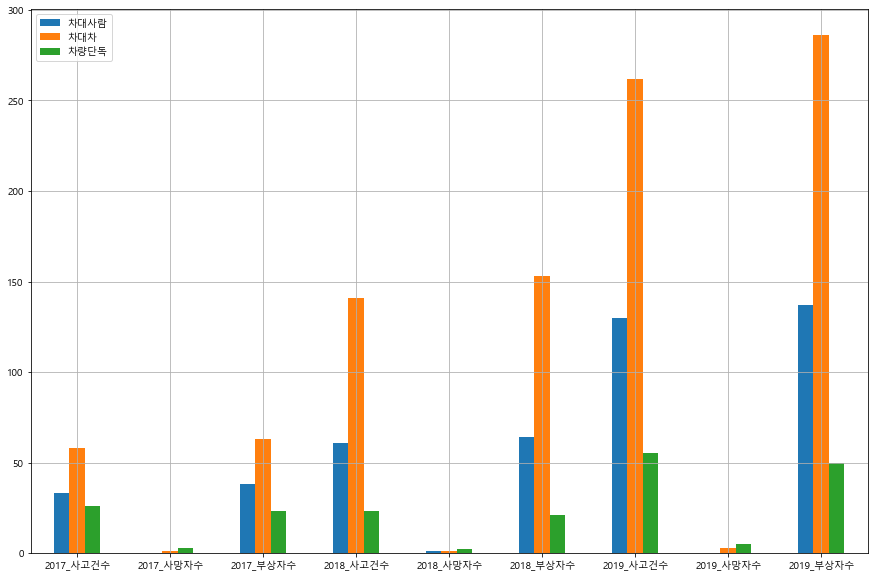

In [53]:
x=[i for i in range(9)]
df_sum.plot(kind='bar',grid=True,figsize=(15,10))
plt.xticks(x,df_sum.index,rotation='horizontal')